<a href="https://colab.research.google.com/github/Ashish47-Aluwala/Data_Analysis_using_python_3-1/blob/main/DAP_Exam_2203A51103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
p = 0.82
lambda_poisson = 25
num_sensors = 40
num_days = 5000

print(f"Detection probability (p): {p}")
print(f"Average number of speeding vehicles per sensor (lambda_poisson): {lambda_poisson}")
print(f"Number of sensors per block (num_sensors): {num_sensors}")
print(f"Total number of days to simulate (num_days): {num_days}")

Detection probability (p): 0.82
Average number of speeding vehicles per sensor (lambda_poisson): 25
Number of sensors per block (num_sensors): 40
Total number of days to simulate (num_days): 5000


In [2]:
import numpy as np

total_speeding_vehicles_per_day = []
total_detected_vehicles_per_day = []

for day in range(num_days):
    daily_speeding_vehicles = 0
    daily_detected_vehicles = 0
    for sensor in range(num_sensors):
        speeding_vehicles = np.random.poisson(lambda_poisson)
        detected_vehicles = np.random.binomial(speeding_vehicles, p)
        daily_speeding_vehicles += speeding_vehicles
        daily_detected_vehicles += detected_vehicles
    total_speeding_vehicles_per_day.append(daily_speeding_vehicles)
    total_detected_vehicles_per_day.append(daily_detected_vehicles)

total_speeding_vehicles_per_day = np.array(total_speeding_vehicles_per_day)
total_detected_vehicles_per_day = np.array(total_detected_vehicles_per_day)

print(f"Shape of total_speeding_vehicles_per_day: {total_speeding_vehicles_per_day.shape}")
print(f"Shape of total_detected_vehicles_per_day: {total_detected_vehicles_per_day.shape}")

Shape of total_speeding_vehicles_per_day: (5000,)
Shape of total_detected_vehicles_per_day: (5000,)


In [3]:
detection_rate_per_day = total_detected_vehicles_per_day / total_speeding_vehicles_per_day
mean_detection_rate = np.mean(detection_rate_per_day)
std_detection_rate = np.std(detection_rate_per_day)

print(f"Mean daily detection rate: {mean_detection_rate:.4f}")
print(f"Standard deviation of daily detection rate: {std_detection_rate:.4f}")

Mean daily detection rate: 0.8201
Standard deviation of daily detection rate: 0.0119


**Reasoning**:
To visualize the distribution of daily detection rates, a histogram is suitable. I will use `matplotlib.pyplot` to create the histogram, ensuring proper labels, a title, and a good figure size for readability.



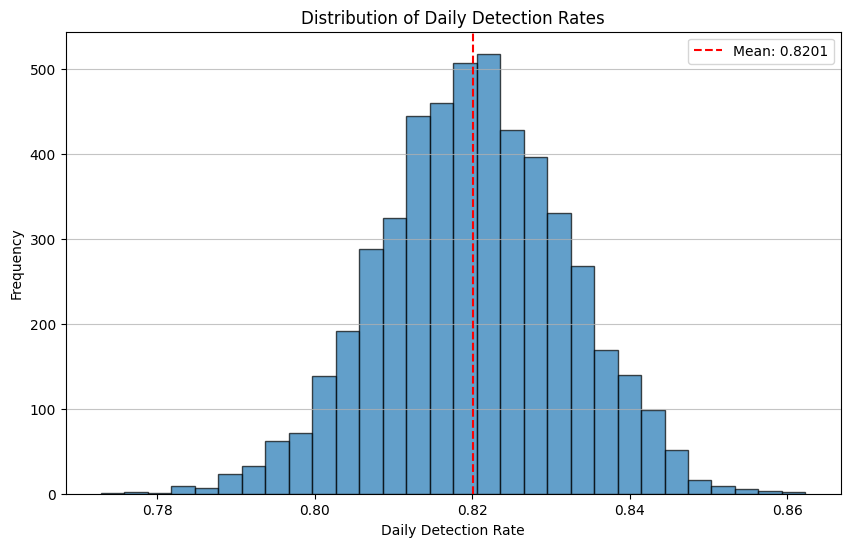

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(detection_rate_per_day, bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Daily Detection Rates')
plt.xlabel('Daily Detection Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.axvline(x=mean_detection_rate, color='red', linestyle='--', label=f'Mean: {mean_detection_rate:.4f}')
plt.legend()
plt.show()


In [5]:
from scipy import stats

sample_size = len(detection_rate_per_day)
standard_error = std_detection_rate / np.sqrt(sample_size)

# For a 95% confidence interval, alpha = 0.05, so alpha/2 = 0.025
# Degrees of freedom = sample_size - 1
confidence_level = 0.95
degrees_freedom = sample_size - 1

t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_freedom)

margin_of_error = t_critical * standard_error

confidence_interval_lower = mean_detection_rate - margin_of_error
confidence_interval_upper = mean_detection_rate + margin_of_error

print(f"95% Confidence Interval for Mean Daily Detection Rate: ({confidence_interval_lower:.4f}, {confidence_interval_upper:.4f})")

95% Confidence Interval for Mean Daily Detection Rate: (0.8198, 0.8205)


In [6]:
probability_less_than_750 = np.sum(total_detected_vehicles_per_day < 750) / num_days

overall_expected_detection_rate = np.sum(total_detected_vehicles_per_day) / np.sum(total_speeding_vehicles_per_day)

total_undetected_vehicles = np.sum(total_speeding_vehicles_per_day - total_detected_vehicles_per_day)
total_detected_vehicles = np.sum(total_detected_vehicles_per_day)
ratio_detected_to_undetected = total_detected_vehicles / total_undetected_vehicles

print(f"Probability that total daily detections are less than 750: {probability_less_than_750:.4f}")
print(f"Overall expected detection rate: {overall_expected_detection_rate:.4f}")
print(f"Ratio of total detected violations to total undetected violations: {ratio_detected_to_undetected:.4f}")

Probability that total daily detections are less than 750: 0.0070
Overall expected detection rate: 0.8201
Ratio of total detected violations to total undetected violations: 4.5598


In [7]:
import numpy as np

# 1. Calculate the daily detection proportion
daily_detection_proportion = total_detected_vehicles_per_day / total_speeding_vehicles_per_day

# 3. Implement a bootstrap sampling process
num_bootstrap_samples = 10000
bootstrap_means = []

for _ in range(num_bootstrap_samples):
    # a. Randomly sample (with replacement) from the daily_detection_proportion array
    resampled_proportions = np.random.choice(daily_detection_proportion, size=len(daily_detection_proportion), replace=True)
    # b. Calculate the mean of this resampled array
    bootstrap_mean = np.mean(resampled_proportions)
    # c. Store it
    bootstrap_means.append(bootstrap_mean)

# 4. After generating all bootstrap means, sort the array of bootstrap means
bootstrap_means_sorted = np.sort(bootstrap_means)

# 5. Calculate the 95% percentile-bootstrap confidence interval
lower_bound_95 = np.percentile(bootstrap_means_sorted, 2.5)
upper_bound_95 = np.percentile(bootstrap_means_sorted, 97.5)

# 6. Calculate the 99% percentile-bootstrap confidence interval
lower_bound_99 = np.percentile(bootstrap_means_sorted, 0.5)
upper_bound_99 = np.percentile(bootstrap_means_sorted, 99.5)

# 7. Print the calculated 95% and 99% confidence intervals
print(f"95% Percentile-Bootstrap Confidence Interval for Mean Detection Proportion: ({lower_bound_95:.4f}, {upper_bound_95:.4f})")
print(f"99% Percentile-Bootstrap Confidence Interval for Mean Detection Proportion: ({lower_bound_99:.4f}, {upper_bound_99:.4f})")


95% Percentile-Bootstrap Confidence Interval for Mean Detection Proportion: (0.8198, 0.8205)
99% Percentile-Bootstrap Confidence Interval for Mean Detection Proportion: (0.8197, 0.8206)


In [8]:
required_detection_threshold = 0.80

print(f"Required detection threshold: {required_detection_threshold}")
print(f"Lower bound of 95% bootstrap CI for mean detection proportion: {lower_bound_95:.4f}")

if lower_bound_95 >= required_detection_threshold:
    print(f"Conclusion: The system meets the requirement that 'At least 80% of speeding vehicles must be detected', as the lower bound of the 95% bootstrap confidence interval ({lower_bound_95:.4f}) is greater than or equal to the 80% threshold.")
else:
    print(f"Conclusion: The system does NOT meet the requirement that 'At least 80% of speeding vehicles must be detected', as the lower bound of the 95% bootstrap confidence interval ({lower_bound_95:.4f}) is less than the 80% threshold.")

Required detection threshold: 0.8
Lower bound of 95% bootstrap CI for mean detection proportion: 0.8198
Conclusion: The system meets the requirement that 'At least 80% of speeding vehicles must be detected', as the lower bound of the 95% bootstrap confidence interval (0.8198) is greater than or equal to the 80% threshold.


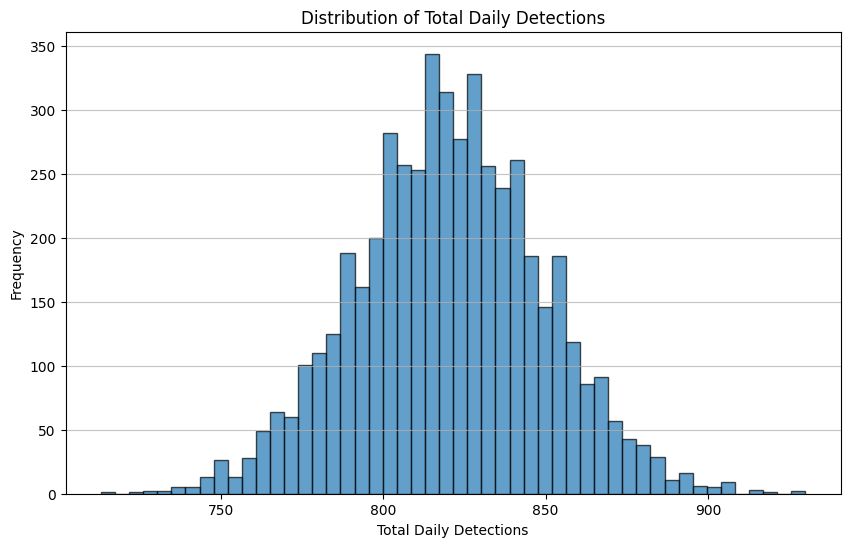

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(total_detected_vehicles_per_day, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Daily Detections')
plt.xlabel('Total Daily Detections')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

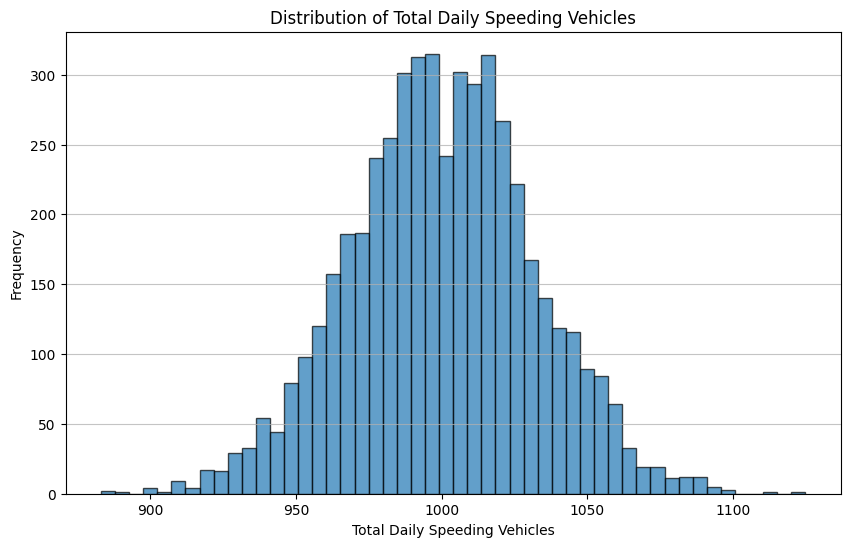

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(total_speeding_vehicles_per_day, bins=50, edgecolor='black', alpha=0.7)
plt.title('Distribution of Total Daily Speeding Vehicles')
plt.xlabel('Total Daily Speeding Vehicles')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

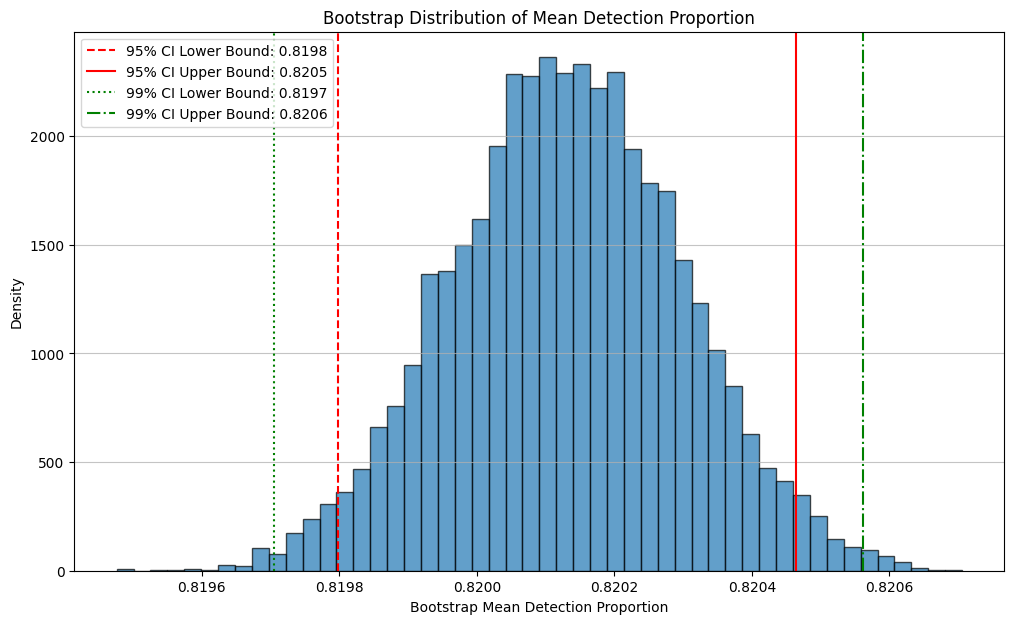

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.hist(bootstrap_means, bins=50, edgecolor='black', alpha=0.7, density=True)
plt.title('Bootstrap Distribution of Mean Detection Proportion')
plt.xlabel('Bootstrap Mean Detection Proportion')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)

# Add 95% CI lines
plt.axvline(x=lower_bound_95, color='red', linestyle='--', label=f'95% CI Lower Bound: {lower_bound_95:.4f}')
plt.axvline(x=upper_bound_95, color='red', linestyle='-', label=f'95% CI Upper Bound: {upper_bound_95:.4f}')

# Add 99% CI lines
plt.axvline(x=lower_bound_99, color='green', linestyle=':', label=f'99% CI Lower Bound: {lower_bound_99:.4f}')
plt.axvline(x=upper_bound_99, color='green', linestyle='-.', label=f'99% CI Upper Bound: {upper_bound_99:.4f}')

plt.legend()
plt.show()